In [49]:
#pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.7 MB/s 


In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, auc, accuracy_score, classification_report, ConfusionMatrixDisplay, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [115]:
df = pd.read_csv('/content/sample_data/cancer.csv')

In [116]:
df.tail(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [117]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [118]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [119]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [120]:
df['radius_mean'].isnull().sum()

0

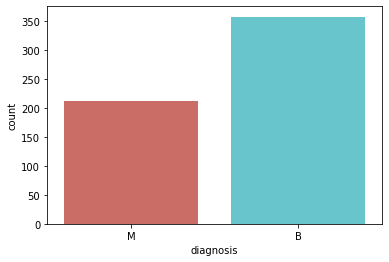

In [121]:
#plotting the Y Variable category data
sns.countplot(x='diagnosis', data=df, palette='hls')
plt.show()

In [122]:
#checking the class imbalance with code

M_case_Count = len(df[df['diagnosis']=='M'])
B_case_Count = len(df[df['diagnosis']=='B'])
MPercentage = M_case_Count/(M_case_Count+B_case_Count)
BPercentage = B_case_Count/(M_case_Count+B_case_Count)
print("percentage of Diagnosis M is", MPercentage*100)
print("percentage of Diagnosis B is", BPercentage*100)

percentage of Diagnosis M is 37.258347978910365
percentage of Diagnosis B is 62.741652021089635


In [123]:
# Checking for INFLUENCE IN Y VARIABLE GIVEN THE X VARIABLES DATA
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [124]:
# Patients with Diagnosis Malign and Benign
# A malign tumor has irregular borders and grows faster than a benign tumor seen from the Variables 'perimeter_worst' and  'area_worst'
# Other Stats can also be read

In [125]:
df = df.drop(columns=['id'], axis=0)

In [126]:
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [127]:
df['diagnosis'].replace(['M','B'], [1,0], inplace = True)


In [128]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [129]:
X = df.iloc[:, :30].values

In [130]:
print(X.shape)
print(type(X))
print(X)

(569, 30)
<class 'numpy.ndarray'>
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [131]:
y = df.iloc[:, 30].values

In [132]:
print(y.shape)
print(type(y))
print(y)

(569,)
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

In [133]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=.3, random_state=42)

In [134]:
print(X_train.shape)
print(X_test.shape)
print("----------------------")
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
----------------------
(398,)
(171,)


In [135]:
dfTrain = pd.DataFrame(X_train)
dfTrain.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
1,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
2,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
3,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
4,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


In [136]:
dfTest = pd.DataFrame(X_test)
dfTest.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [137]:
#Scale them to Make all the Data units same using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
dfTrainScaled = pd.DataFrame(X_train)
dfTrainScaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613


In [139]:
dfTestScaled = pd.DataFrame(X_test)
dfTestScaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.483132,-0.132858,-0.460297,-0.496272,0.268255,0.048819,-0.103177,-0.271603,0.454285,0.147266,...,-0.274805,-0.144019,-0.342412,-0.357781,0.470899,-0.076033,-0.007133,-0.193383,0.210480,0.226487
1,1.349062,0.511034,1.292043,1.311971,-0.427073,-0.007883,0.256363,0.824931,-0.823795,-1.112550,...,1.788338,0.178777,1.771589,1.726472,-0.542399,-0.104328,0.001034,1.019684,-0.533417,-1.008662
2,0.363585,0.076229,0.389285,0.248676,0.962856,0.371436,0.752901,0.861040,0.476642,-0.649789,...,0.620127,0.082271,0.530729,0.480937,0.992770,-0.065254,0.564609,0.588685,-0.073904,-0.191326
3,-0.502955,-0.351449,-0.444632,-0.535612,0.686470,0.553274,-0.137137,-0.542949,0.029501,1.154290,...,-0.710798,-0.431872,-0.537318,-0.642149,0.575273,0.093064,-0.143943,-0.629083,-0.525384,0.574570
4,-0.746493,-1.121269,-0.725765,-0.716687,0.282075,0.170045,-0.266288,-0.597378,0.055584,0.712249,...,-0.840135,-0.969310,-0.865086,-0.743897,0.118637,-0.251194,-0.453296,-0.699924,-0.890102,-0.125596


In [140]:
lr = LogisticRegressionCV(max_iter=500)

In [141]:
lr.fit(X_train,y_train)

LogisticRegressionCV(max_iter=500)

In [142]:
testPredict = lr.predict(X_test)
trainPredict = lr.predict(X_train)

In [143]:
scoreTest = accuracy_score(y_test,testPredict)
print(scoreTest)

0.9824561403508771


In [144]:
scoreTrain = accuracy_score(y_train,trainPredict)
print(scoreTrain)

0.9874371859296482


In [145]:
# Predicting one value based on any 1 Input from TEST Data, COnsidering first sample
print(lr.predict(X_test[0].reshape(1,-1)))

[0]


In [152]:
# PREDITING RESULTS FOR FIRST 20 SAMPLES FROM TRAIN DATA and validate the results from TRAIN DATA ABOVE
print(lr.predict(X_train[0:20]))
#0 0 0 0 0 1 0 0 0 0
#0 0 1 1 1 0 0 1 0 1 

[0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1]


In [153]:
# PREDITING RESULTS FOR FIRST 20 SAMPLES FROM TRAIN DATA and validate the results from TEST DATA ABOVE
print(lr.predict(X_test[0:20]))
#0 1 1 0 0 1 1 1 0 0
#0 1 0 1 0 1 0 0 0 1

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1]


In [155]:
cmTESTDATA = confusion_matrix(y_test,testPredict)
print(cmTESTDATA)

[[106   2]
 [  1  62]]


Text(0.5, 1.0, 'Accuracy Score: 0.9824561403508771')

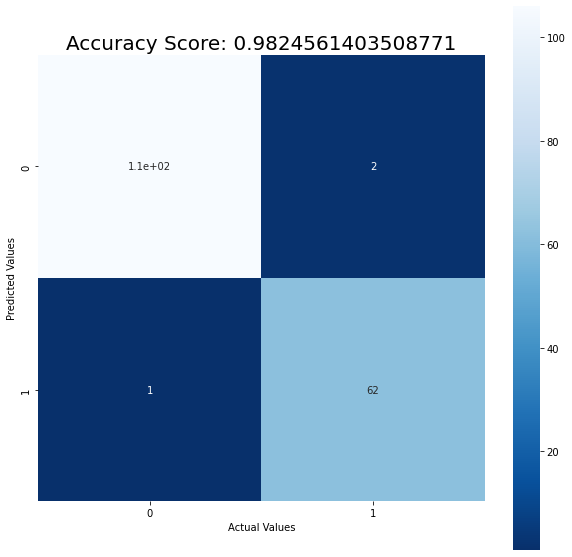

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(cmTESTDATA, annot=True, cmap='Blues_r', square=True)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
all_title = 'Accuracy Score: {0}'.format(scoreTest)
plt.title(all_title,  size=20)

In [156]:
cmTRAINDATA = confusion_matrix(y_train,trainPredict)
print(cmTRAINDATA)

[[248   1]
 [  4 145]]


Text(0.5, 1.0, 'Accuracy Score: 0.9874371859296482')

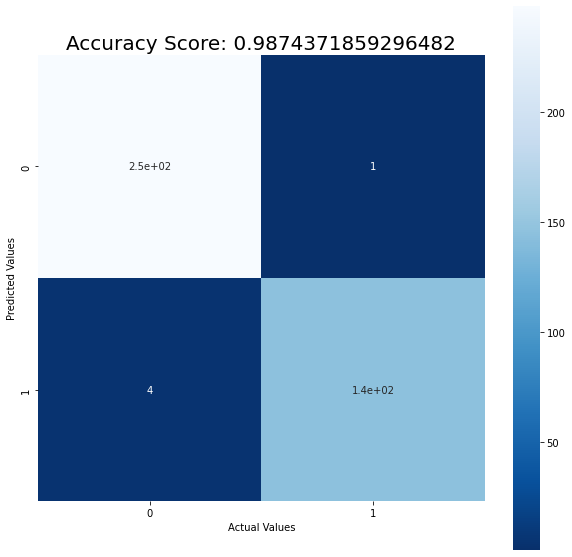

In [165]:
plt.figure(figsize=(10,10))
sns.heatmap(cmTRAINDATA, annot=True, cmap='Blues_r', square=True)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
all_title = 'Accuracy Score: {0}'.format(scoreTrain)
plt.title(all_title,  size=20)

In [159]:
#  REPORT FOR TEST
classreportTestData=  classification_report(y_test,testPredict)
print(classreportTestData)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [160]:
#  REPORT FOR TRAIN DATA
classreportTrainData=  classification_report(y_train,trainPredict)
print(classreportTrainData)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       249
           1       0.99      0.97      0.98       149

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



In [170]:
#MY FAV ROC CURVE FOR  MODEL ACCURACY VALIDATION
# TRAIN AND TEST DATA GETTING TPR AND FPR WITH ROC_CURVE FUNCTION
Y_PredProba_train = lr.predict_proba(X_train)
Y_PredProba_test = lr.predict_proba(X_test)

In [171]:
# GET THE SIMILARITY(TPR) AND 1-SPECIFICITY(FPR) TO FIND THE ROC SCORE FOR TRAIN DATA AND TEST DATA
fprTrain,tprTrain,thresholdTrain = roc_curve(y_train, Y_PredProba_train[:,1], pos_label=1)
fprTest,tprTest,thresholdTest = roc_curve(y_test, Y_PredProba_test[:,1], pos_label=1)

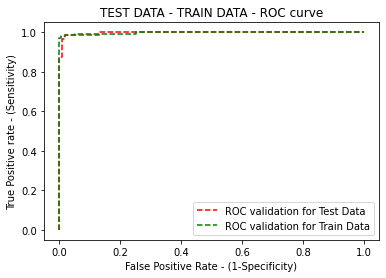

In [173]:
#plot roc curves
plt.plot(fprTest, tprTest, linestyle='--',color='red', label='ROC validation for Test Data')
plt.plot(fprTrain, tprTrain, linestyle='--',color='green', label='ROC validation for Train Data')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('TEST DATA - TRAIN DATA - ROC curve')
# x label
plt.xlabel('False Positive Rate - (1-Specificity)')
# y label
plt.ylabel('True Positive rate - (Sensitivity)')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [174]:
#THE MODEL GIVES BEST RESULT WHEN IT CURVE COVERS MAX AREA UNDER THE CURVE